# Chronic Disease Indicators Data Analysis

**Les indicateurs de maladie chronique (CDI)** sont un ensemble d'indicateurs de surveillance développés par consensus entre le  **Centre pour le Contrôle et la Prévention des catastrophes (CDC)**, **le Conseil d'État et les épidémiologistes territoriaux (CSTE)** et **l'Association nationale des directeurs des maladies chroniques (NACDD)** des USA. Les CDI permet aux professionnels de la santé publique et aux décideurs de récupérer des données d'état et de métropoles sélectionnées de manière uniforme pour les maladies chroniques et les facteurs de risque qui ont un impact substantiel sur la santé publique. Ces indicateurs sont essentiels pour la surveillance, la priorisation et l'évaluation des interventions de santé publique.

Description des colonnes du dataset:

1. **Topic**: +400k lignes de données qui sont regroupées dans les **17 catégories ou sujets** (**alcool; arthrite; asthme;  cancer; maladie cardiovasculaire; maladie rénale chronique; maladie pulmonaire obstructive chronique; Diabète; immunisation; nutrition, activité physique et poids; santé bucco-dentaire; le tabac; conditions générales**)
2. **TopicID**:une étiquette abrégée des sujets
3. **Question**:Dans chaque sujet, il y a un certain nombre de questions,ce sont les 202 indicateurs uniques de l'ensemble de données
4. **QuestionID**: ID de chaque question
5. **DataSource** : il y ait 33 sources de données
6. **DataValueType** : type des données
7. **DataValue vs DataValueAlt** :la colonne des données qui sera la cible dans notre future analyse,cette colonne se compose de valeurs numériques sous forme chaine de caractere tandis que **DataValueAlt** est composée de valeur numérique en float64.
8. **DataValueUnit** : les unités des valeurs de DataValue (*pourcentages,montants en dollars,années ..etc*)
9. **Stratification and Stratification Category related columns**: Il y a 12 colonnes liées aux stratifications, qui sont des sous-groupes au sein de chaque indicateur tels que **le sexe, la race, l'âge, etc..**. Dans **StratificationCategory1**, il y a **sexe,Overall et la race**. Dans **Stratification1**, les valeurs se composent **des types de race** à titre d'exemple. Dans les colonnes ID telles que **StratificationID1**, nous avons des étiquettes correspondantes pour la race




Notre etude ici,se limite sur les questions suivantes qui concernent les lycéens américains :

1. 'Computer use among high school students',
2. 'Healthy weight among high school students',
3. 'Median daily frequency of fruit consumption among high school students',
4. 'Median daily frequency of vegetable consumption among high school students',
5. 'Meeting aerobic physical activity guidelines among high school students',
6. 'Obesity among high school students',
7. 'Overweight or obesity among high school students',
8. 'Participation in daily school physical education classes among high school students',
9. 'Soda consumption among high school students',
10. 'Television viewing among high school students'


In [2]:
import pandas as pd
pd.set_option("display.max_columns",100)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

from sklearn.decomposition import PCA
from sklearn import preprocessing 
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [3]:
dataset=pd.read_csv("dataset.csv")

In [4]:
dataset

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,DataValue,DataValueAlt,DataValueFootnoteSymbol,DatavalueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,StratificationCategory3,Stratification3,GeoLocation,ResponseID,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,2015,2015,AK,Alaska,YRBSS,Alcohol,Alcohol use among youth,NaN,%,Crude Prevalence,22,22.00,NaN,NaN,19.7,24.5,Overall,Overall,NaN,NaN,NaN,NaN,"(64.84507995700051, -147.72205903599973)",NaN,2,ALC,ALC1_1,CrdPrev,OVERALL,OVR,NaN,NaN,NaN,NaN
1,2015,2015,AL,Alabama,YRBSS,Alcohol,Alcohol use among youth,NaN,%,Crude Prevalence,30.7,30.70,NaN,NaN,27.3,34.3,Overall,Overall,NaN,NaN,NaN,NaN,"(32.84057112200048, -86.63186076199969)",NaN,1,ALC,ALC1_1,CrdPrev,OVERALL,OVR,NaN,NaN,NaN,NaN
2,2015,2015,AR,Arkansas,YRBSS,Alcohol,Alcohol use among youth,NaN,%,Crude Prevalence,27.6,27.60,NaN,NaN,24.5,30.8,Overall,Overall,NaN,NaN,NaN,NaN,"(34.74865012400045, -92.27449074299966)",NaN,5,ALC,ALC1_1,CrdPrev,OVERALL,OVR,NaN,NaN,NaN,NaN
3,2015,2015,AZ,Arizona,YRBSS,Alcohol,Alcohol use among youth,NaN,%,Crude Prevalence,34.8,34.80,NaN,NaN,29.7,40.2,Overall,Overall,NaN,NaN,NaN,NaN,"(34.865970280000454, -111.76381127699972)",NaN,4,ALC,ALC1_1,CrdPrev,OVERALL,OVR,NaN,NaN,NaN,NaN
4,2015,2015,CA,California,YRBSS,Alcohol,Alcohol use among youth,NaN,%,Crude Prevalence,28.9,28.90,NaN,NaN,23.6,34.7,Overall,Overall,NaN,NaN,NaN,NaN,"(37.63864012300047, -120.99999953799971)",NaN,6,ALC,ALC1_1,CrdPrev,OVERALL,OVR,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403979,2001,2001,VT,Vermont,"NVSS, Mortality",Overarching Conditions,Life expectancy at age 65 years,NaN,Years,Number,18.17,18.17,NaN,NaN,NaN,NaN,Overall,Overall,NaN,NaN,NaN,NaN,"(43.62538123900049, -72.51764079099962)",NaN,50,OVC,OVC4_2,Nmbr,OVERALL,OVR,NaN,NaN,NaN,NaN
403980,2001,2001,WA,Washington,"NVSS, Mortality",Overarching Conditions,Life expectancy at age 65 years,NaN,Years,Number,18.8,18.80,NaN,NaN,NaN,NaN,Overall,Overall,NaN,NaN,NaN,NaN,"(47.52227862900048, -120.47001078999972)",NaN,53,OVC,OVC4_2,Nmbr,OVERALL,OVR,NaN,NaN,NaN,NaN
403981,2001,2001,WI,Wisconsin,"NVSS, Mortality",Overarching Conditions,Life expectancy at age 65 years,NaN,Years,Number,18.87,18.87,NaN,NaN,NaN,NaN,Overall,Overall,NaN,NaN,NaN,NaN,"(44.39319117400049, -89.81637074199966)",NaN,55,OVC,OVC4_2,Nmbr,OVERALL,OVR,NaN,NaN,NaN,NaN
403982,2001,2001,WV,West Virginia,"NVSS, Mortality",Overarching Conditions,Life expectancy at age 65 years,NaN,Years,Number,16.8,16.80,NaN,NaN,NaN,NaN,Overall,Overall,NaN,NaN,NaN,NaN,"(38.66551020200046, -80.71264013499967)",NaN,54,OVC,OVC4_2,Nmbr,OVERALL,OVR,NaN,NaN,NaN,NaN


# 1- Recuperation des données dont les questions concernent seulement les lycéens américains

In [5]:
School_Health=['Computer use among high school students',
        'Healthy weight among high school students',
        'Median daily frequency of fruit consumption among high school students',
        'Median daily frequency of vegetable consumption among high school students',
        'Meeting aerobic physical activity guidelines among high school students',
        'Obesity among high school students',
        'Overweight or obesity among high school students',
        'Participation in daily school physical education classes among high school students',
        'Soda consumption among high school students',
        'Television viewing among high school students'
       ]



grouped=dataset.groupby("Question") #regroupe les données par question

dataset=pd.DataFrame() #initialisation d'un dataframe vide

#pour chacun de ces groupes,on recupere les données de ceux dont le noms figure dans la listes ci-dessus,et on les aggrege dans
#une seule dataframe
for name,groupe in grouped:
    if name in School_Health:
        dataset=dataset.append(groupe)
dataset

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,DataValue,DataValueAlt,DataValueFootnoteSymbol,DatavalueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,StratificationCategory3,Stratification3,GeoLocation,ResponseID,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
47869,2015,2015,ME,Maine,YRBSS,"Nutrition, Physical Activity, and Weight Status",Computer use among high school students,NaN,%,Crude Prevalence,38.3,38.3,NaN,NaN,36.4,40.3,Overall,Overall,NaN,NaN,NaN,NaN,"(45.254228894000505, -68.98503133599962)",NaN,23,NPAW,NPAW21_0,CrdPrev,OVERALL,OVR,NaN,NaN,NaN,NaN
48071,2015,2015,MI,Michigan,YRBSS,"Nutrition, Physical Activity, and Weight Status",Computer use among high school students,NaN,%,Crude Prevalence,40.6,40.6,NaN,NaN,37.3,44.0,Overall,Overall,NaN,NaN,NaN,NaN,"(44.6613195430005, -84.71439026999968)",NaN,26,NPAW,NPAW21_0,CrdPrev,OVERALL,OVR,NaN,NaN,NaN,NaN
48152,2015,2015,MN,Minnesota,YRBSS,"Nutrition, Physical Activity, and Weight Status",Computer use among high school students,NaN,%,Crude Prevalence,NaN,NaN,-,No data available,NaN,NaN,Overall,Overall,NaN,NaN,NaN,NaN,"(46.35564873600049, -94.79420050299967)",NaN,27,NPAW,NPAW21_0,CrdPrev,OVERALL,OVR,NaN,NaN,NaN,NaN
48741,2015,2015,MO,Missouri,YRBSS,"Nutrition, Physical Activity, and Weight Status",Computer use among high school students,NaN,%,Crude Prevalence,37.4,37.4,NaN,NaN,33.5,41.5,Overall,Overall,NaN,NaN,NaN,NaN,"(38.635790776000476, -92.56630005299968)",NaN,29,NPAW,NPAW21_0,CrdPrev,OVERALL,OVR,NaN,NaN,NaN,NaN
48759,2015,2015,VA,Virginia,YRBSS,"Nutrition, Physical Activity, and Weight Status",Computer use among high school students,NaN,%,Crude Prevalence,41.9,41.9,NaN,NaN,39.4,44.3,Overall,Overall,NaN,NaN,NaN,NaN,"(37.54268067400045, -78.45789046299967)",NaN,51,NPAW,NPAW21_0,CrdPrev,OVERALL,OVR,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341129,2013,2013,VT,Vermont,YRBSS,"Nutrition, Physical Activity, and Weight Status",Television viewing among high school students,NaN,%,Crude Prevalence,NaN,NaN,-,No data available,NaN,NaN,Overall,Overall,NaN,NaN,NaN,NaN,"(43.62538123900049, -72.51764079099962)",NaN,50,NPAW,NPAW20_0,CrdPrev,OVERALL,OVR,NaN,NaN,NaN,NaN
341130,2013,2013,WA,Washington,YRBSS,"Nutrition, Physical Activity, and Weight Status",Television viewing among high school students,NaN,%,Crude Prevalence,NaN,NaN,-,No data available,NaN,NaN,Overall,Overall,NaN,NaN,NaN,NaN,"(47.52227862900048, -120.47001078999972)",NaN,53,NPAW,NPAW20_0,CrdPrev,OVERALL,OVR,NaN,NaN,NaN,NaN
341131,2013,2013,WI,Wisconsin,YRBSS,"Nutrition, Physical Activity, and Weight Status",Television viewing among high school students,NaN,%,Crude Prevalence,22.5,22.5,NaN,NaN,19.7,25.5,Overall,Overall,NaN,NaN,NaN,NaN,"(44.39319117400049, -89.81637074199966)",NaN,55,NPAW,NPAW20_0,CrdPrev,OVERALL,OVR,NaN,NaN,NaN,NaN
341132,2013,2013,WV,West Virginia,YRBSS,"Nutrition, Physical Activity, and Weight Status",Television viewing among high school students,NaN,%,Crude Prevalence,32.9,32.9,NaN,NaN,29.0,37.0,Overall,Overall,NaN,NaN,NaN,NaN,"(38.66551020200046, -80.71264013499967)",NaN,54,NPAW,NPAW20_0,CrdPrev,OVERALL,OVR,NaN,NaN,NaN,NaN


In [6]:
dataset["Question"].unique() 

array(['Computer use among high school students',
       'Healthy weight among high school students',
       'Median daily frequency of fruit consumption among high school students',
       'Median daily frequency of vegetable consumption among high school students',
       'Meeting aerobic physical activity guidelines among high school students',
       'Obesity among high school students',
       'Overweight or obesity among high school students',
       'Participation in daily school physical education classes among high school students',
       'Soda consumption among high school students',
       'Television viewing among high school students'], dtype=object)

In [7]:
dataset.info() #description des données

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1071 entries, 47869 to 341133
Data columns (total 34 columns):
YearStart                    1071 non-null int64
YearEnd                      1071 non-null int64
LocationAbbr                 1071 non-null object
LocationDesc                 1071 non-null object
DataSource                   1071 non-null object
Topic                        1071 non-null object
Question                     1071 non-null object
Response                     0 non-null object
DataValueUnit                1071 non-null object
DataValueType                1071 non-null object
DataValue                    825 non-null object
DataValueAlt                 825 non-null float64
DataValueFootnoteSymbol      247 non-null object
DatavalueFootnote            247 non-null object
LowConfidenceLimit           825 non-null float64
HighConfidenceLimit          825 non-null float64
StratificationCategory1      1071 non-null object
Stratification1              1071 non-null ob

**Remarque**: Tous les valeurs des colonnes **Response,ResponseID,StratificationCategory2,Stratification2,StratificationCategory3,Stratification3,
StratificationCategoryID2,StratificationID2,StratificationCategoryID3 et StratificationID3** 
sont tous **null**,donc on va supprimer ces colonnes

In [8]:
dataset=dataset.drop(columns=["Response","ResponseID","StratificationCategory2","Stratification2","StratificationCategory3",
                    "Stratification3","StratificationCategoryID2","StratificationID2","StratificationCategoryID3",
                    "StratificationID3"])
dataset.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,DataValueAlt,DataValueFootnoteSymbol,DatavalueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,GeoLocation,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1
47869,2015,2015,ME,Maine,YRBSS,"Nutrition, Physical Activity, and Weight Status",Computer use among high school students,%,Crude Prevalence,38.3,38.3,NaN,NaN,36.4,40.3,Overall,Overall,"(45.254228894000505, -68.98503133599962)",23,NPAW,NPAW21_0,CrdPrev,OVERALL,OVR
48071,2015,2015,MI,Michigan,YRBSS,"Nutrition, Physical Activity, and Weight Status",Computer use among high school students,%,Crude Prevalence,40.6,40.6,NaN,NaN,37.3,44.0,Overall,Overall,"(44.6613195430005, -84.71439026999968)",26,NPAW,NPAW21_0,CrdPrev,OVERALL,OVR
48152,2015,2015,MN,Minnesota,YRBSS,"Nutrition, Physical Activity, and Weight Status",Computer use among high school students,%,Crude Prevalence,NaN,NaN,-,No data available,NaN,NaN,Overall,Overall,"(46.35564873600049, -94.79420050299967)",27,NPAW,NPAW21_0,CrdPrev,OVERALL,OVR
48741,2015,2015,MO,Missouri,YRBSS,"Nutrition, Physical Activity, and Weight Status",Computer use among high school students,%,Crude Prevalence,37.4,37.4,NaN,NaN,33.5,41.5,Overall,Overall,"(38.635790776000476, -92.56630005299968)",29,NPAW,NPAW21_0,CrdPrev,OVERALL,OVR
48759,2015,2015,VA,Virginia,YRBSS,"Nutrition, Physical Activity, and Weight Status",Computer use among high school students,%,Crude Prevalence,41.9,41.9,NaN,NaN,39.4,44.3,Overall,Overall,"(37.54268067400045, -78.45789046299967)",51,NPAW,NPAW21_0,CrdPrev,OVERALL,OVR


## 1.1-Répartition des données par sujet

In [9]:
print("Nombre de sujet :",dataset["Topic"].unique().shape[0])
print("sujet :",dataset["Topic"].unique()[0])

Nombre de sujet : 1
sujet : Nutrition, Physical Activity, and Weight Status


**Remarque** :**Nutrition, Physical Activity, and Weight Status** est le principal sujet de ces questions

## 1.2-Repartion des types de données

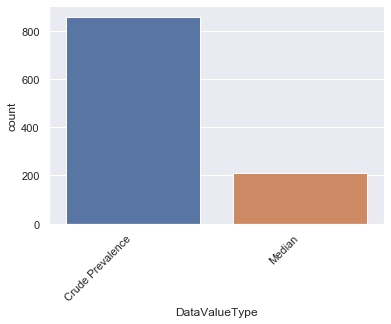

In [10]:
ax=sns.countplot(x="DataValueType",data=dataset)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45,horizontalalignment='right')
plt.show()

**Remarque**:Tous les valeurs sont des valeurs Mediane ou des Pourcentages

# 2- Régroupements des données par Question et Localisation

In [11]:
df_qloc =dataset.pivot_table(values='DataValueAlt',index=["QuestionID"], 
                                 columns=['LocationAbbr']).round(2)
df_qloc.head()

LocationAbbr,AK,AL,AR,AZ,CA,CT,DC,DE,FL,GA,GU,HI,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,PA,PR,RI,SC,SD,TN,TX,US,UT,VA,VT,WI,WV,WY
QuestionID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
NPAW11_4,20.90,25.10,28.05,23.85,25.3,25.65,16.20,24.20,24.70,24.7,23.50,21.15,28.75,26.10,25.3,28.3,21.35,NaN,23.55,20.55,21.95,25.65,26.60,23.55,28.20,25.10,25.05,31.00,22.6,27.6,31.00,26.30,24.50,25.9,35.35,24.8,18.20,21.75,23.70,27.90,25.65,30.0,27.1,19.7,24.45,24.25,24.0,28.40,27.65
NPAW12_1,15.95,33.95,25.80,24.65,38.8,11.50,NaN,12.10,23.20,33.6,11.50,7.00,21.90,62.15,28.0,27.9,20.80,33.6,18.40,16.90,5.15,24.60,26.95,26.85,33.80,25.20,36.30,33.85,18.2,45.2,26.10,27.50,18.65,NaN,32.95,18.5,37.30,22.05,24.20,15.85,23.80,38.3,29.6,18.6,13.30,14.50,39.4,27.95,22.55
NPAW12_2,17.30,30.70,30.25,19.60,14.2,12.90,21.25,20.65,21.45,24.4,17.80,14.60,14.45,20.15,20.0,21.6,32.65,NaN,14.00,17.30,NaN,19.25,22.25,33.25,18.40,27.40,21.05,21.35,13.0,12.2,21.10,15.35,17.20,20.5,30.35,18.2,33.45,15.00,27.95,23.40,30.90,25.0,23.7,13.5,19.35,14.80,19.6,34.05,22.75
NPAW1_2,13.20,16.60,17.90,10.80,13.9,12.30,14.95,15.00,11.95,12.7,20.25,13.15,10.35,12.05,13.6,12.6,18.25,13.5,10.60,11.25,12.45,13.65,14.00,17.15,9.85,14.45,13.75,12.85,11.7,8.7,14.10,11.80,11.85,13.0,14.55,14.0,11.00,11.35,15.10,13.30,17.75,15.7,13.8,6.4,12.50,12.80,11.6,16.75,10.85
NPAW20_0,21.35,31.95,31.90,25.90,23.1,23.00,36.15,30.90,29.70,32.2,24.70,25.55,19.65,25.45,22.3,25.0,26.10,33.7,25.00,29.05,23.10,24.35,23.40,36.45,22.25,31.75,19.95,21.45,19.1,28.5,25.55,25.70,25.80,28.2,30.40,27.8,32.40,24.65,30.85,22.55,31.65,32.9,28.6,14.9,26.05,NaN,22.5,29.85,21.55


In [12]:
df_qloc=df_qloc.T #Transposition du dataframe
df_qloc

QuestionID,NPAW11_4,NPAW12_1,NPAW12_2,NPAW1_2,NPAW20_0,NPAW21_0,NPAW2_2,NPAW3_2,NPAW4_1,NPAW5_1
LocationAbbr,,,,,,,,,,
AK,20.90,15.95,17.30,13.20,21.35,33.90,28.48,68.71,1.00,1.30
AL,25.10,33.95,30.70,16.60,31.95,39.00,33.23,63.94,0.85,1.00
AR,28.05,25.80,30.25,17.90,31.90,35.25,34.89,62.41,1.00,1.00
AZ,23.85,24.65,19.60,10.80,25.90,38.70,24.51,71.50,1.00,1.10
CA,25.30,38.80,14.20,13.90,23.10,42.10,30.40,66.90,1.00,1.30
CT,25.65,11.50,12.90,12.30,23.00,37.25,26.38,70.58,1.00,1.30
DC,16.20,NaN,21.25,14.95,36.15,39.25,32.65,64.43,1.00,1.00
DE,24.20,12.10,20.65,15.00,30.90,37.70,31.02,66.06,1.00,NaN
FL,24.70,23.20,21.45,11.95,29.70,41.55,26.54,69.75,1.00,1.05


In [13]:
Questions=["Meeting aerobic physical activity guidelines among high school students",
 "Participation in daily school physical education classes among high school students",
 "Soda consumption among high school students",
 "Obesity among high school students",
 "Television viewing among high school students	Computer use among high school students",
 "Overweight or obesity among high school students",
 "Healthy weight among high school students",
 "Median daily frequency of fruit consumption among high school students",
 "Median daily frequency of vegetable consumption among high school students"]

In [14]:
#reinitialisation des index du dataframe,cela à pour consequent de transformé l'index "LocationAbbr",en une colonne à part 
#entiere du dataframe qui indique la localisation

df_qloc=df_qloc.reset_index()
df_qloc

QuestionID,LocationAbbr,NPAW11_4,NPAW12_1,NPAW12_2,NPAW1_2,NPAW20_0,NPAW21_0,NPAW2_2,NPAW3_2,NPAW4_1,NPAW5_1
0,AK,20.90,15.95,17.30,13.20,21.35,33.90,28.48,68.71,1.00,1.30
1,AL,25.10,33.95,30.70,16.60,31.95,39.00,33.23,63.94,0.85,1.00
2,AR,28.05,25.80,30.25,17.90,31.90,35.25,34.89,62.41,1.00,1.00
3,AZ,23.85,24.65,19.60,10.80,25.90,38.70,24.51,71.50,1.00,1.10
4,CA,25.30,38.80,14.20,13.90,23.10,42.10,30.40,66.90,1.00,1.30
5,CT,25.65,11.50,12.90,12.30,23.00,37.25,26.38,70.58,1.00,1.30
6,DC,16.20,NaN,21.25,14.95,36.15,39.25,32.65,64.43,1.00,1.00
7,DE,24.20,12.10,20.65,15.00,30.90,37.70,31.02,66.06,1.00,NaN
8,FL,24.70,23.20,21.45,11.95,29.70,41.55,26.54,69.75,1.00,1.05
9,GA,24.70,33.60,24.40,12.70,32.20,35.50,29.80,67.25,1.00,1.00


# 3- Imputation itérative des valeurs manquants :

**L'Imputation itérative (Iterative imputer)** modélise chaque features avec des valeurs manquantes en fonction d'autres features.
À chaque étape, une entité est sélectionnée en sortie **Y** et toutes les autres entités sont traitées en tant qu'entrées **X**.Un régresseur est ensuite entrainée sur **X** et **Y** pour prédire les valeurs manquantes de **Y**.

In [15]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

df=df_qloc.drop(["LocationAbbr"],axis=1) #ignore la colonne "LocationAbbr"

imp = IterativeImputer(RandomForestRegressor(), max_iter = 10 , random_state = 0 )

df=pd.DataFrame(imp.fit_transform(df),columns=df.columns)
df["LocationAbbr"]=df_qloc["LocationAbbr"]
df

QuestionID,NPAW11_4,NPAW12_1,NPAW12_2,NPAW1_2,NPAW20_0,NPAW21_0,NPAW2_2,NPAW3_2,NPAW4_1,NPAW5_1,LocationAbbr
0,20.90,15.950,17.300,13.20,21.35,33.90,28.48,68.71,1.00,1.300,AK
1,25.10,33.950,30.700,16.60,31.95,39.00,33.23,63.94,0.85,1.000,AL
2,28.05,25.800,30.250,17.90,31.90,35.25,34.89,62.41,1.00,1.000,AR
3,23.85,24.650,19.600,10.80,25.90,38.70,24.51,71.50,1.00,1.100,AZ
4,25.30,38.800,14.200,13.90,23.10,42.10,30.40,66.90,1.00,1.300,CA
5,25.65,11.500,12.900,12.30,23.00,37.25,26.38,70.58,1.00,1.300,CT
6,16.20,23.775,21.250,14.95,36.15,39.25,32.65,64.43,1.00,1.000,DC
7,24.20,12.100,20.650,15.00,30.90,37.70,31.02,66.06,1.00,1.000,DE
8,24.70,23.200,21.450,11.95,29.70,41.55,26.54,69.75,1.00,1.050,FL
9,24.70,33.600,24.400,12.70,32.20,35.50,29.80,67.25,1.00,1.000,GA


# 4- Analyse Uni-Dimensionnelle

## 4.1- Statistiques descripitif

In [16]:
df.describe() 

QuestionID,NPAW11_4,NPAW12_1,NPAW12_2,NPAW1_2,NPAW20_0,NPAW21_0,NPAW2_2,NPAW3_2,NPAW4_1,NPAW5_1
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,25.084286,25.584388,21.272857,13.298980,26.450000,37.454082,28.600408,68.166327,0.977551,1.137449
std,3.384117,10.431945,6.051154,2.544407,4.734822,3.948798,3.631505,3.535416,0.072931,0.140772
min,16.200000,5.150000,12.200000,6.400000,14.900000,25.100000,17.480000,58.200000,0.650000,0.700000
25%,23.550000,18.500000,17.300000,11.800000,23.000000,35.500000,26.380000,66.300000,1.000000,1.050000
50%,25.050000,24.650000,20.500000,13.150000,25.700000,37.550000,28.480000,68.400000,1.000000,1.100000
75%,27.100000,33.600000,24.400000,14.450000,30.400000,39.800000,30.400000,70.310000,1.000000,1.220000
max,35.350000,62.150000,34.050000,20.250000,36.450000,45.600000,38.560000,78.520000,1.000000,1.600000


## 4.2-Projection des données dans l'espace selon les valeurs des questions

In [36]:
import plotly.express as px
import plotly.io as pio
import plotly as pyo

#pio.renderers.default= "notebook_connected"

for QuestionID,Question in zip(df.drop(["LocationAbbr"],axis=1).columns.values,Questions):
    fig = px.choropleth(data_frame=df,locations="LocationAbbr",locationmode="USA-states", scope="usa",
                 color=QuestionID)
    fig.update_layout(title_text=Question)
    fig.show()
    pyo.offline.iplot(fig, filename=Question)
    

# 5- Analyse Bi-dimensionnelle :
Elle va nous premettre de degager les correlations eventuelles sur nos variables (**Questions**) deux à deux.

## 5.1- Visualisation des distributions des variables deux à deux

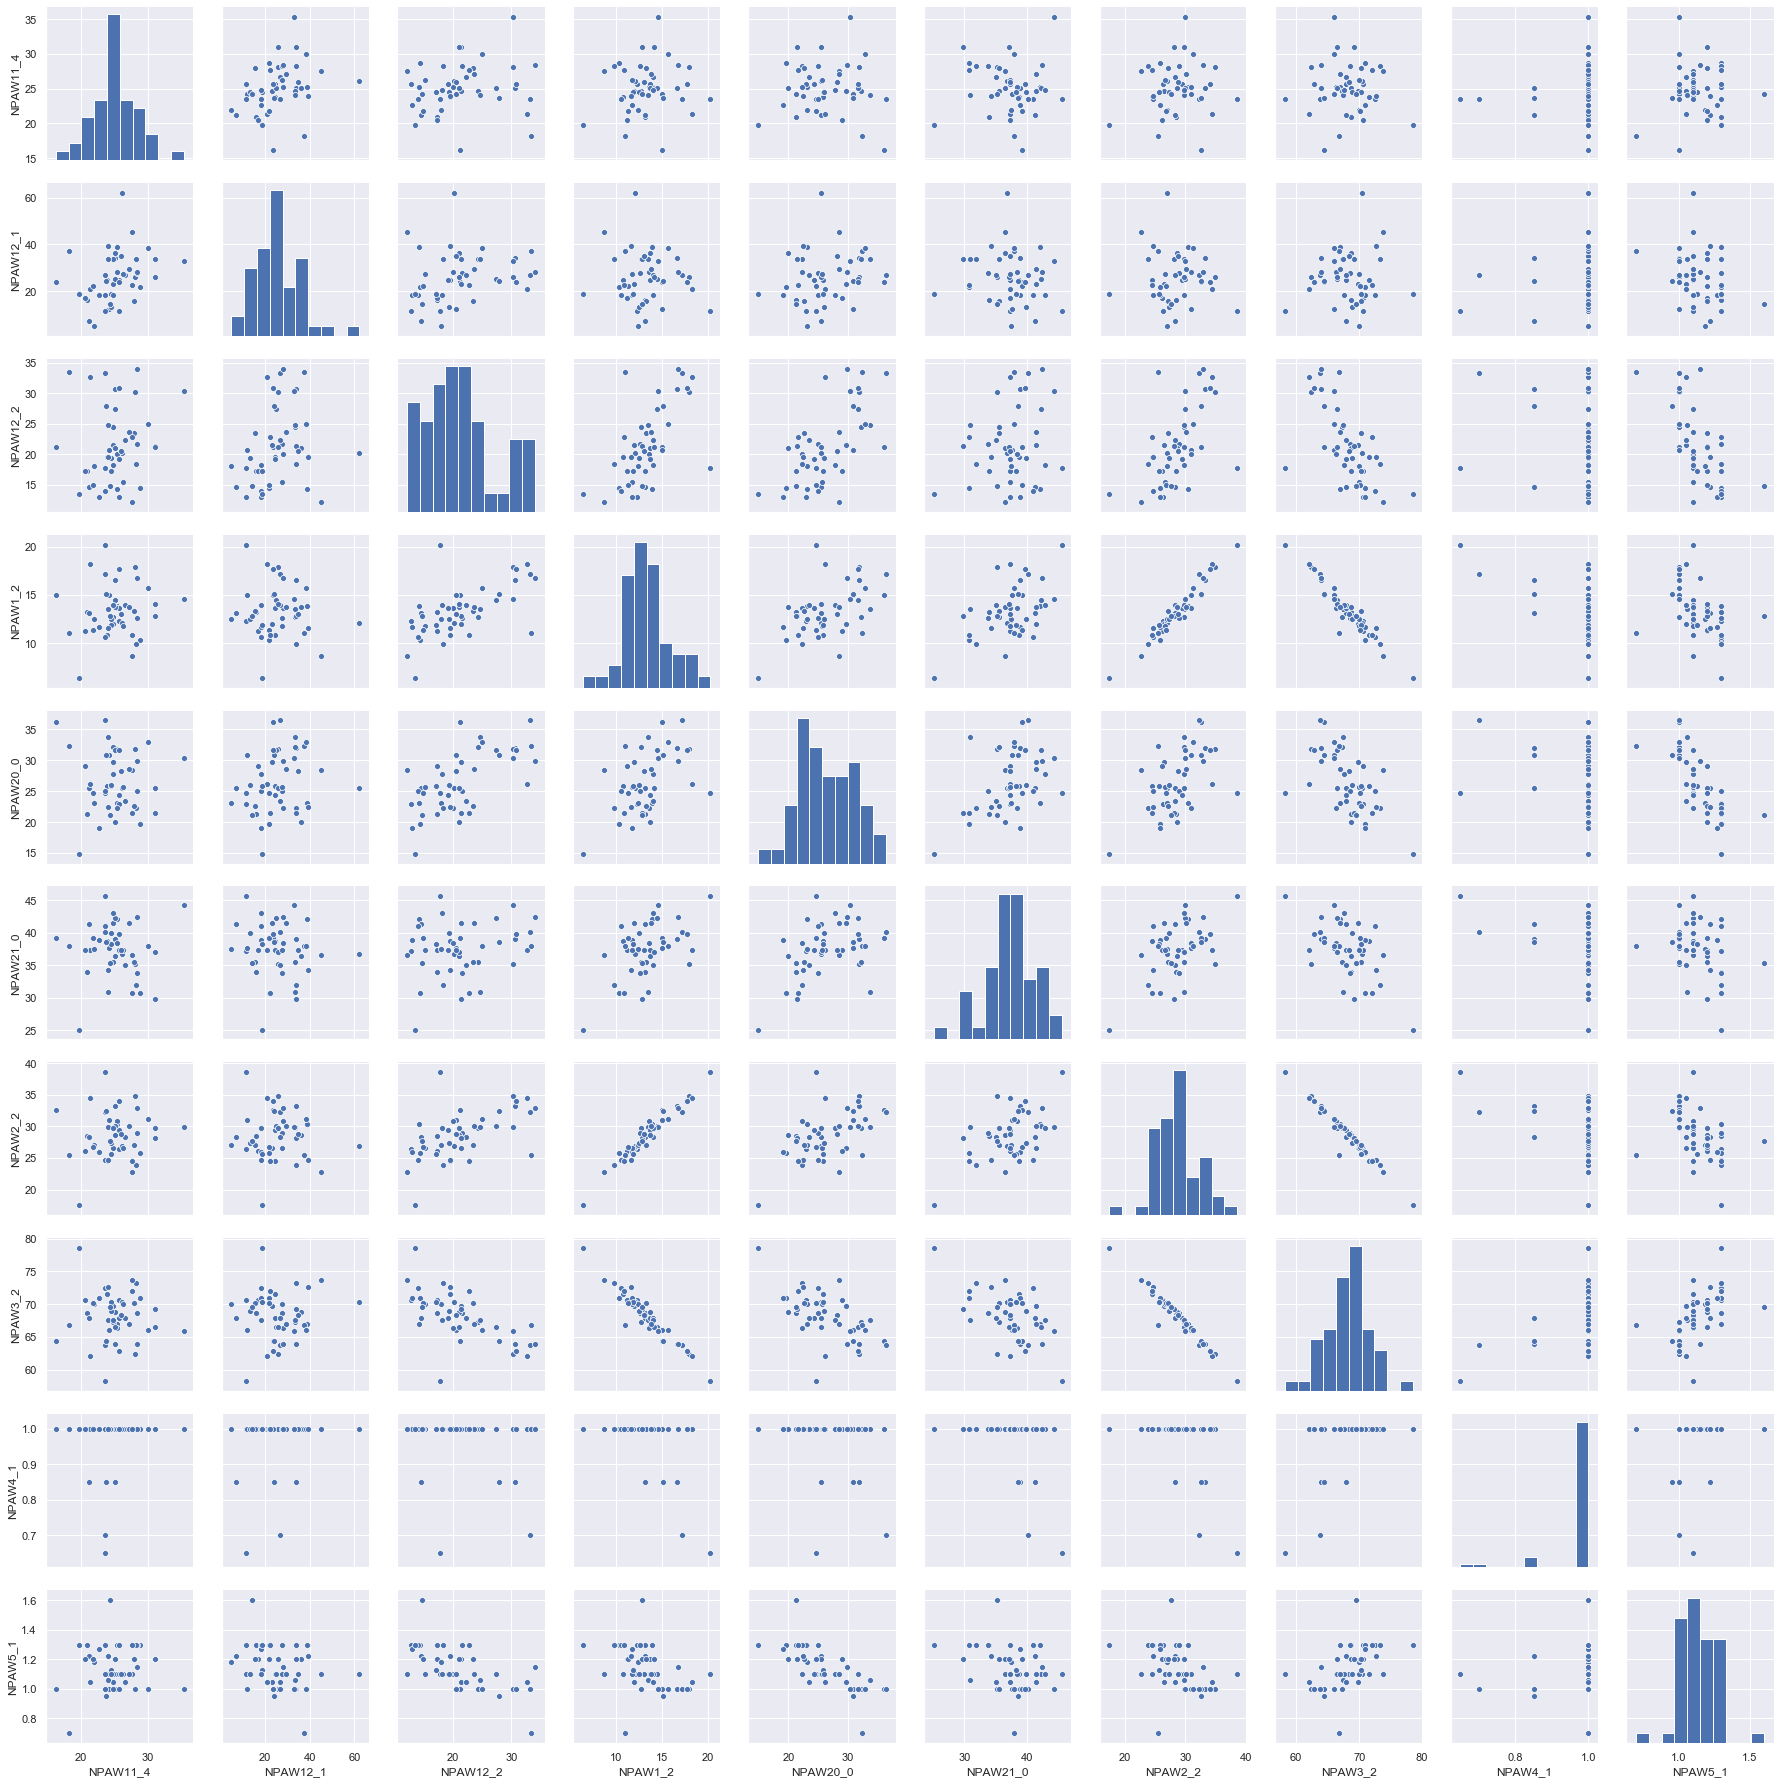

In [40]:
sns.pairplot(df)

## 5.2-Pearson Correlation Heatmap
Seaborn nous permet de tracer des cartes thermiques montrant la corrélation de Pearson entre les questions.

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 <a list of 10 Text xticklabel objects>)

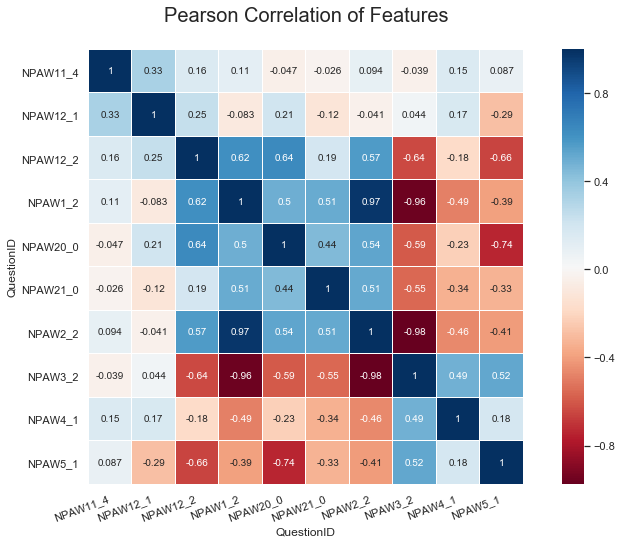

In [20]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,8))
plt.title('Pearson Correlation of Features', y=1.05, size=20)
ax=sns.heatmap(df.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xticks(rotation=20,horizontalalignment='right')

### Remarque:
A travers ces deux graphique,on peut voir plusieurs correlations existant entre les questions:

1. La forte correlation entre :
   - NPAW2_2 (**Obesity among high school students**) et NPAW1_2 (**Overweight or obesity among high school students**)
   
   - NPAW12_2(**Soda consumption among high school students**) et NPAW1_2(**Overweight or obesity among high school students**)
   - NPAW12_2 (**Soda consumption among high school students**) et NPAW20_0(**Television viewing among high school students**)
   - NPAW1_2 (**Overweight or obesity among high school students**) et NPAW20_0(**Television viewing among high school students**)
   ...etc
2. La forte anti-correlation entre :
   - NPAW3_2(**Healthy weight among high school students**) et NPAW1_2 (**Overweight or obesity among high school students**)
   - NPAW3_2(**Healthy weight among high school students**) et NPAW2_2 (**Obesity among high school students**)
   - NPAW3_2(**Healthy weight among high school students**) et NPAW12_2 (**Soda consumption among high school students**)
   - NPAW5_1 (**Median daily frequency of vegetable consumption among high school students**) et NPAW20_0(**Television viewing among high school students**)
   ...etc
   

#  6- Analyse Multidimensionnelle :
Pour effectuer **une analyse exploratoire multidimensionnelle**,nous utiliserons deux méthodes populaires pour analyser rapidement notre échantillon en réduisant la dimension du nombre d'individus ou de variables:
1. **L'Analyse en Composantes Principales (ACP)** permet de dégager rapidement les principales tendances de notre échantillon, en diminuant le nombre de variables nécessaires à la représentation de nos données tout en perdant le moins d'informations possible.
2. L'algorithme du **Kmeans** qui permet de regrouper les individus (ici **les Etats**) selon leurs similarités.

## 6.1- ACP
il a 2 objectifs principals:
1. **La liaison entre les variables**: s'il y'a des groupes de variables(**Questions**) très correlées entre elles qui peuvent etre regroupé en de nouvelles variable synthetique.
2. **La variabilité entre les individus** : les differences et les ressemblances entre les individus (**les Etats**)

In [21]:

# choix du nombre de composantes à calculer
n_comp = 2
X=df.drop(["LocationAbbr"],axis=1).values #recuperation de la matrice des données

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = PCA(n_components=n_comp)
pca.fit(X_scaled)

# projection des individus
X_projected = pca.transform(X_scaled)

Pourcentage total de variance expliqué =  65.11 %


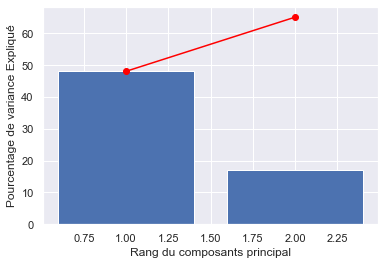

In [22]:
def display_scree_plot(pca):
    
    scree = pca.explained_variance_ratio_*100
    print("Pourcentage total de variance expliqué = ",round(pca.explained_variance_ratio_.sum()*100,2),"%")
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("Rang du composants principal")
    plt.ylabel("Pourcentage de variance Expliqué")
    
    #plt.title("Eboulis des valeurs propres")
    plt.show(block=False)

display_scree_plot(pca)

### 6.1.1-La liaison entre les variables :
Étudions donc les corrélations entre les variables initiales et les composantes principales

In [23]:
# Plot a variable factor map for the first two dimensions.

def display_circles_correlation(pca,variable_names,axis_ranks=(0,1)):
    
    d1,d2=axis_ranks
    for i in range(pca.components_.shape[1]):
        
        #dessine une fleche
        plt.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[d1, i],  #0 for PC1
             pca.components_[d2, i],  #1 for PC2
             head_width=0.1,
             head_length=0.1)
        
        plt.text(pca.components_[d1, i] + 0.05,
                 pca.components_[d2, i] + 0.05,
                 variable_names[i],fontsize='16',ha='center',va='center')
   
    # nom des axes, avec le pourcentage de variance expliqué
    plt.xlabel('F{} ({}%)'.format(1, round(100*pca.explained_variance_ratio_[d1],1)))
    plt.ylabel('F{} ({}%)'.format(2, round(100*pca.explained_variance_ratio_[d2],1)))
    
    # affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
    plt.axis('equal')
    
    plt.title('Cercle de Correlation')
    #plt.show()

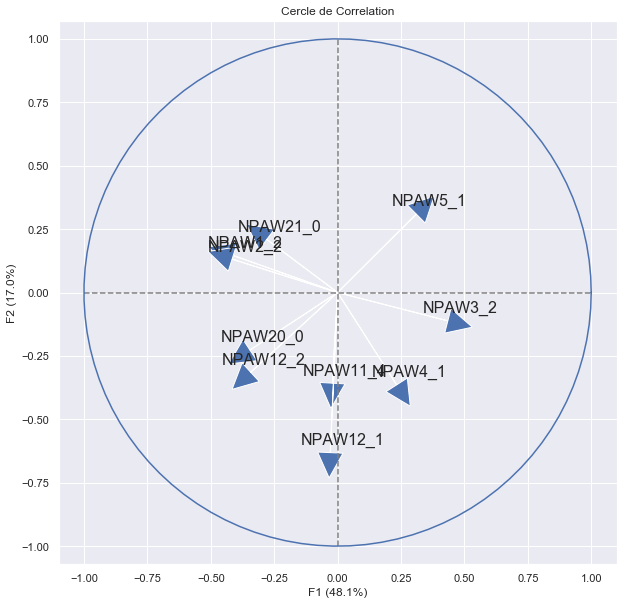

In [24]:
(fig, ax) = plt.subplots(figsize=(10,10))
display_circles_correlation(pca,df.drop(["LocationAbbr"],axis=1).columns.values)

### Interpretation du Cercle de Correlation :
Pour detecter les variables fortement corrélées aux variables synthétiques **F1 et F2**,Il suffit de savoir une chose : **la projection de la flèche (représentant la variable ) sur une axe F1 correspond au coefficient de corrélation entre F1 et ce variable**.(De meme pour F2)


1. Les variables les plus corrélées à **F1** sont :
   1. **NPAW12_1 (Participation in daily school physical education classes among high school students)**
   2. **NPAW12_4 (Meeting aerobic physical activity guidelines among high school students)**

   Elles sont corrélées negativement à **F1**, mais on a aussi la variable **NPAW5_1 (Median daily frequency of fruit consumption among high school students)** qui est corrélée positivement à F1.
   
   Il se trouve que toutes ces variables ont une notion qui les unit qui est : "**"Augmentation du sel dans le corps"**
   En effet il a etait demontré que les legumes contiennent une quantité importante de sel,donc consommé beacoup de legume  permet aussi d'augmenté le taux de sel dans le corps,et l'un des solutions pour diminuer le taux de sel dans le corps c'est faire des activité physique,d'ou leur anti-correlation.
   
2. De meme, les variables les plus à corrélées à **F2** sont :
   1. **NPAW1_2 (Obesity among high school students)**
   2. **NPAW2_2 (Overweight or obesity among high school students)**
   
   Elles sont corrélées negativement à **F2**, mais on a aussi la variable **NPAW3_2 (Healthy weight among high school students)** qui est corrélée positivement à F2
   
   On peut donc interpréter **F2** comme etant **"Alimentation saine"**.
   
A partir des ces constations,on peut en tiré plusieurs conclusions comme :

- L'obesité est lié a une mauvaise alimentation et une augmentation du taux de sel dans le corps
- La consomation de soda provoque une mauvaise alimentation et une diminution du sel dans le corps




### 6.1.2-La variabilité entre les individus :

Projetons les individus dans le 1ere plan factoriel et essayons de différencier les individus qui ont une abscisse grande de ceux qui en ont une petite ?

In [25]:
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks=[(0,1)], labels=None,clusters=None,alpha=1, 
                             illustrative_var=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            #fig = plt.figure(figsize=(7,6))
        
            # affichage des points
            if illustrative_var is None:
                if clusters is None:
                    plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
                else:
                    plt.scatter(X_projected[:, d1], X_projected[:, d2], c=clusters.astype(np.float), cmap = 'jet', alpha=alpha)
                    
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    
                    #sns.lmplot(x="x", y="y",data=data,  fit_reg=False,scatter_kws={"s": z*1000})
                    if clusters is None:
                        plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                    else:
                        plt.scatter(X_projected[selected, d1], X_projected[selected, d2], c=clusters.astype(np.float), 
                                    cmap = 'jet',alpha=alpha, label=value)
                        
                
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='16') 
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))

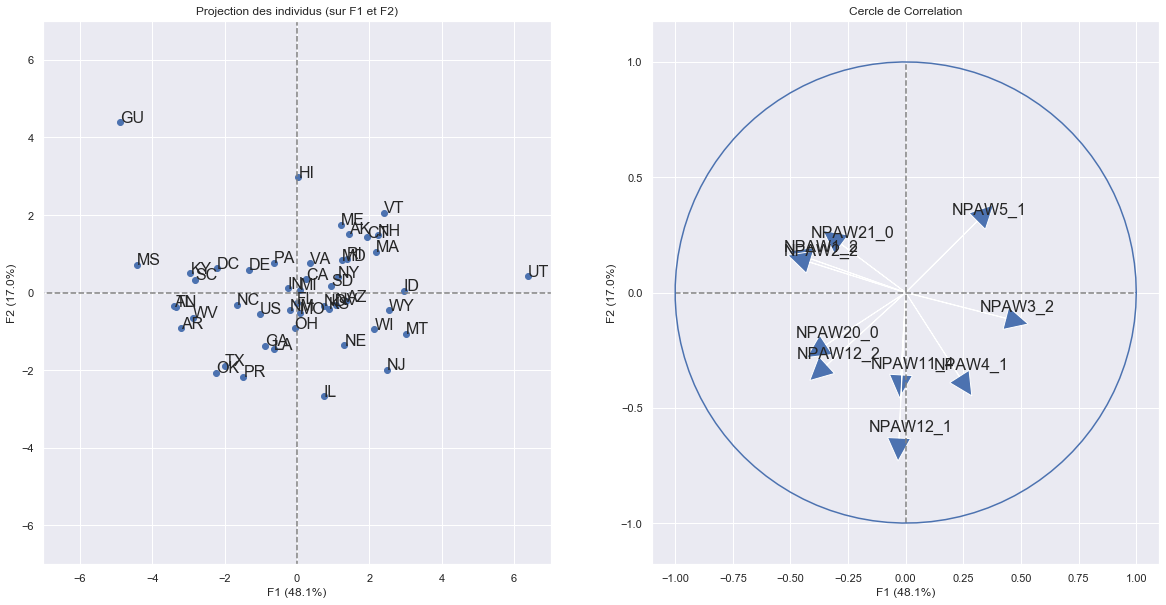

In [26]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
display_factorial_planes(X_projected,n_comp,pca,[(0,1)],df["LocationAbbr"].values)
plt.subplot(1,2,2)
display_circles_correlation(pca,df.drop(["LocationAbbr"],axis=1).columns.values)

### Interpretation :
En effet, nous avons dit que nous pouvions voir les composants principaux comme des «nouvelles variables» qui
synthétisent des variables déjà existantes,ainsi:

1. **F2** peut être vue comme une nouvelle variable que l’on ajoute sous forme de nouvelle colonne à notre échantillon.
   Quand on se déplace le long de l’axe des abscisses de gauche à droite,alors on se déplace vers les points pour lesquels la    valeur de **F2 est grande**,or F2 est representé par **"Alimentation saine"**,ce qui veut dires qu'il y a de grandes chances que les **Etats qui sont à gauche** sont les ceux ou il y'a **une mauvaise alimentation**,contrairement à ceux qui sont à droite.

2. De meme pour **F1** qui represente **L'augmentation du sel dans le corps**,les etats qui sont en haut le long de l'axe des ordonnées, sont ceux possedant une grande valeur,contrairement à ceux qui sont en bas


## 6.2 -Clustering :
On applique K-Means sur les données pour différents nombres de clusters allant de 2 à 10,et on renvoie la solution ayant le meilleure score de Silhouette

In [27]:
def get_best_clustering(X):
    
    silhouettes=[]
    models=[]
    
    for k in range(2,10):

        kmeans=KMeans(n_clusters=k)
        kmeans.fit(X)
            
        silhouettes.append(silhouette_score(X,kmeans.labels_))
        models.append(kmeans)
    
    silhouettes=np.array(silhouettes)
    
    best_model=models[np.argmax(silhouettes)] #recupere le model qui a le meilleurs coef de silhouette
    plt.plot(range(2,10),silhouettes,marker='o')
    plt.xlabel("Nombre de cluster")
    plt.ylabel("Coefficient de Silhouette")
    
    
    return best_model

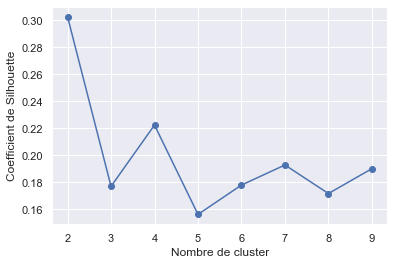

In [28]:
best_model=get_best_clustering(X_scaled)

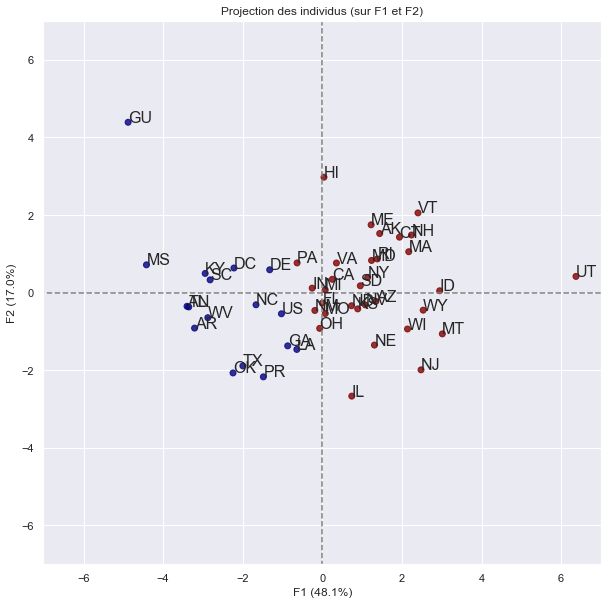

In [29]:
# Récupération des clusters attribués à chaque individu
clusters = best_model.labels_

# Affichage du clustering par projection des individus sur le premier plan factoriel
X_projected = pca.transform(X_scaled)
plt.figure(figsize=(10,10))
display_factorial_planes(X_projected,n_comp,pca,[(0,1)],df["LocationAbbr"].values,clusters=clusters,alpha=0.8)

## Remarque :
Les Etats sont regroupé selon la qualité de l'alimantation des lyceens :

En effet les etats qui sont a droite (**Utah,Illinois,Massachusetts...etc**) sont ceux ou on observes une bonne alimentation,par contre ceux a gauche (**Missouri,Texas,Nevadas ...etc**)sont ceux ou il y'a une mauvaise alimentations chez le jeunes.  

In [37]:
#spatialisation des données
fig = px.choropleth(data_frame=df,locations="LocationAbbr",locationmode="USA-states", scope="usa",
                    color=clusters)

pyo.offline.iplot(fig, filename='simple-3d-scatter')